# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

These examples use the Jupyter widgets to make it interactive and easier to use and learn.

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from imageio import v3 as imageio
from see import Segmentors
from see import JupyterGUI

Pick an image from the example folder.

Dropdown(description='Choose image:', options=(WindowsPath('Image_data/Examples/a_walk_in_the_park.jpg'), Wind…

import imageio
img = imageio.imread('Image_data\Examples\a_walk_in_the_park.jpg')
gmask = imageio.imread('Image_data\Examples\a_walk_in_the_park_GT.png')


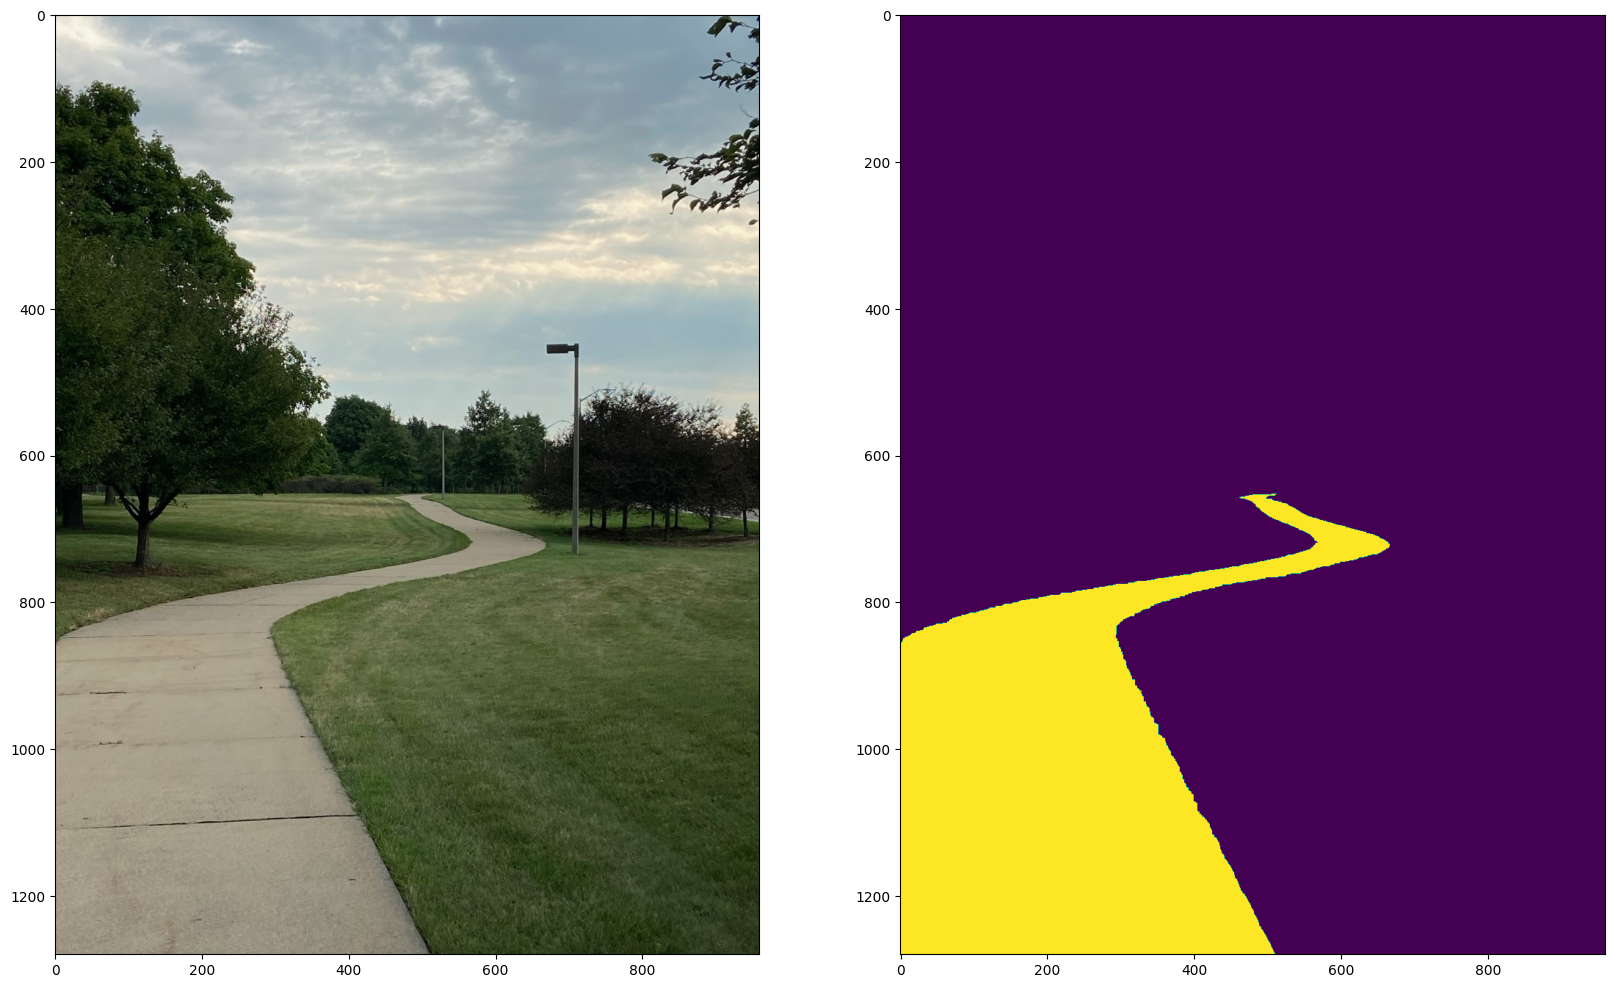

In [2]:
data = JupyterGUI.pickimage('Image_data/Examples/')

# Select ColorSpace

In [3]:
colorspace = JupyterGUI.colorwidget(data.img, paramlist=None)

seg.params = {'colorspace': 'RGB', 'multichannel': True, 'channel': 2}


GridBox(children=(SelectionSlider(continuous_update=False, description='colorspace', options=('RGB', 'HSV', 'R…

Output()

----
<a name="Manual_Search"></a>

## Manual Search

Manual searching of parameters can easily be done using the provided GUI. Pre-established parameters can be put into the widget, or the parameter values can be changed using the sliders. To change the algorithm, simply change the `alg` input. For a list of available inputs print `Segmentors.algorithmspace`


In [4]:
from see.Segmentors import segmentor

alg = JupyterGUI.picksegment(list(segmentor.algorithmspace.keys()))

Dropdown(description='Choose Algorithm:', options=('ColorThreshold', 'Felzenszwalb', 'Slic', 'SlicO', 'Watersh…

ColorThreshold.

    Peform Color Thresholding segmentation algorithm. Segments parts of the image
    based on the numerical values for the respective channel.

    Parameters:
    mulitchannel - (multichannel) - bool, Whether the image is 2D or 3D
    colorspace - (colorspace) Select the colorspace [‘RGB’, ‘HSV’, ‘RGB CIE’, ‘XYZ’, ‘YUV’, ‘YIQ’, ‘YPbPr’, ‘YCbCr’, ‘YDbDr’]
    channel - (channel) color chanel (0:R/H/L 1:G/S/A, 2:B/V/B)
    ch0_mn - (alpha1) - minimum thresholding value for channel 0
    ch0_mx - (alpha2) - maximum thresholding value for channel 0
    ch1_mn - (beta1) - minimum thresholding value for channel 1
    ch1_mx - (beta2) - maximum thresholding value for channel 1
    ch2_mn - (gamma1) - minimum thresholding value for channel 2
    ch2_mx - (gamma2) - maximum thresholding value for channel 2

    Note: a colorspace of 'HSV' and a channel of 2 is a grayscale image.

    Typically any pixel between my_mn and my_mx are true. Other pixels are false.

    if my_mn >

In [5]:
### Example of input for params
params = JupyterGUI.segmentwidget(data.img, params = None, alg = alg.value)

GridBox(children=(SelectionSlider(continuous_update=False, description='alpha1', options=(0.0, 0.00390625, 0.0…

Output()

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [6]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch
#define algo work flow
workflow.addalgos([colorspace, segmentor, segment_fitness])

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [7]:
mydata = base_classes.pipedata()
mydata.append([data.img])
mydata.gtruth.append(data.gmask)
#def geneticsearch
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [8]:
# warnings may appear when this runs
#population -- Resulting population after ngen generations.
population = my_evolver.run(ngen=1) #5 generation
#fitness 1 is worse , 0 is good

Initializing a new random population
Generation 0/1 of population size 10
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YPbPr
	multichannel = True
	channel = 0
	algorithm = Felzenszwalb
	alpha1 = 0.33984375
	alpha2 = 0.734375
	beta1 = 0.91015625
	beta2 = 0.77734375
	gamma1 = 0.35546875
	gamma2 = 0.97265625
	n_segments = 5
	max_num_iter = 19
Time: 11.608 s
p_fitness=0.9997481537799037,madlad=0.9997481537799037, lad=0.0034716796875, gamma=0.7436604817708333

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = True
	channel = 1
	algorithm = Slic
	alpha1 = 0.33984375
	alpha2 = 0.4375
	beta1 = 0.12109375
	beta2 = 0.5859375
	gamma1 = 0.3046875
	gamma2 = 0.8828125
	n_segments = 7
	max_num_iter = 7
Time: 7.565 s
p_fitness=0.6190151023468974,madlad=0.6190151023468974, lad=0.003424479166666667, gamma=0.6488346354166667

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = SlicO
	alpha1 = 0.83984

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = False
	channel = 0
	algorithm = Felzenszwalb
	alpha1 = 0.1875
	alpha2 = 0.921875
	beta1 = 0.74609375
	beta2 = 0.296875
	gamma1 = 0.609375
	gamma2 = 0.46875
	n_segments = 8
	max_iter = 10

Time: 4.706 s
fitness=0.13652921828966982


#BEST [0.13652921828966982,  ['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]]

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [9]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

Best Individual:
 ['YDbDr', True, 1, 'Slic', 0.33984375, 0.4375, 0.12109375, 0.5859375, 0.3046875, 0.8828125, 7, 7]


We can see the mask this individual generates by evaluating it, then plotting the result:

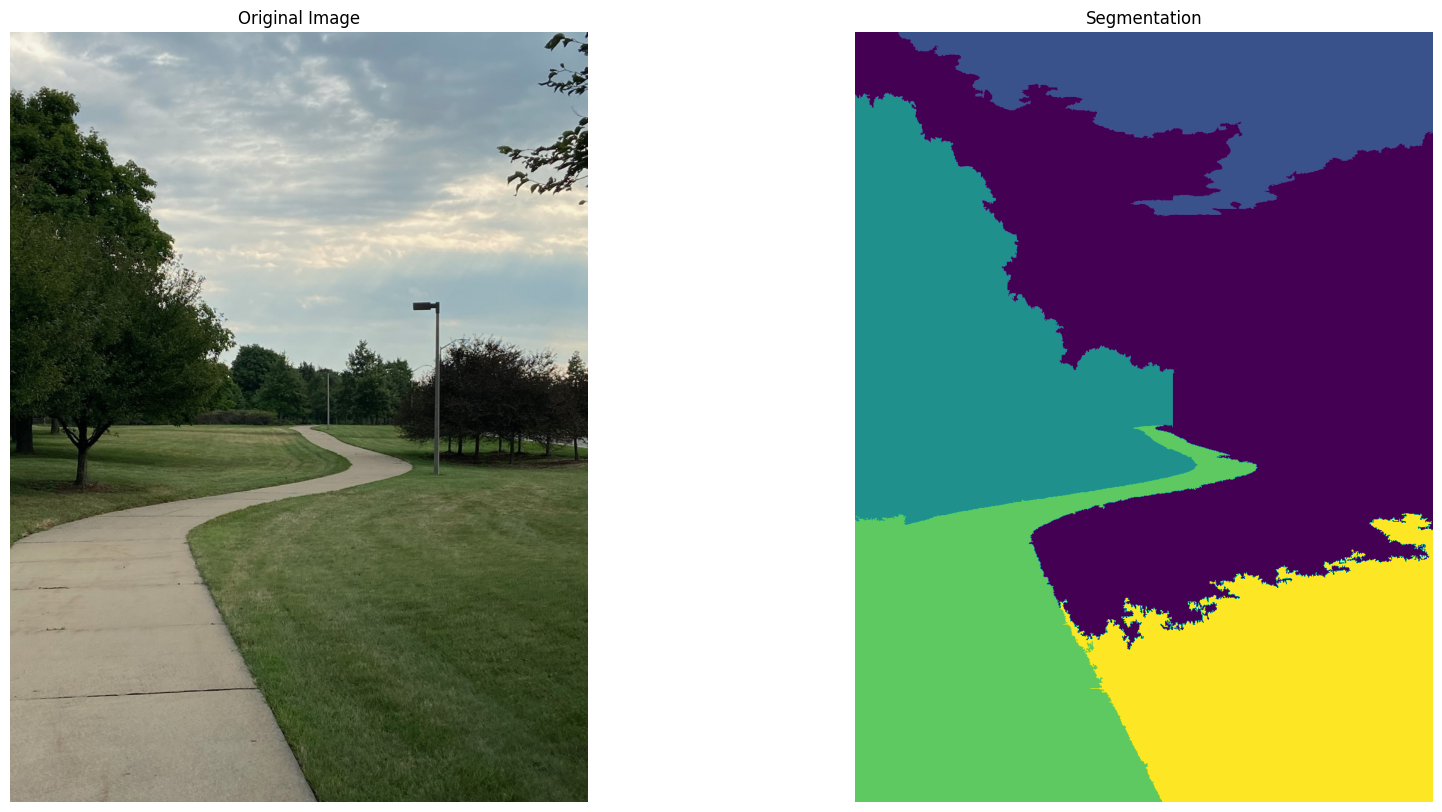

In [10]:
#['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]
#------------------------------------
#this line is the original code
#seg = Segmentors.algoFromParams(params)
# no attribute  .algoFromParams
#------------------------------------
#what if the class is called wrong: 
#seg = segmentor(param)
# KeyError: 'YUV'
#------------------------------------

#use workflow instead, to create a workf class
#since the parameter input might produce error, use the workflow's parameter to make a seg object
workf = workflow(params)

mydata = workf.pipe(mydata)

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(mydata[0][0])
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mydata[0][-1])
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

In [11]:
print(f"Fitnessvalue = {mydata.fitness}")

Fitnessvalue = [0.6190151023468974, 0.6190151023468974, 0.003424479166666667, 0.6488346354166667]


With this code, make sure to import skimage, along with any input images this algorithm will be applied to.